<a href="https://colab.research.google.com/github/drAshcroft/MAT421_Brian/blob/main/Module_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
!pip install sympy
import sympy
import numpy as np
from sympy.plotting import plot


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Numerical integration is done by following the finite difference method from calculus.  

namely df/dt= (f(t)+f(t+e))/e where e is a small number

This can be done manually

Keep in mind that the difference formula reduces the length of the f by 1 due to the subtraction.  Various methods can be used to prevent this, or just program with this knowledge

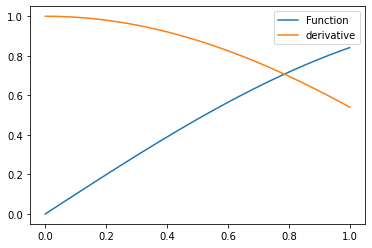

In [4]:
t= np.linspace(0, 1,10000)
e=(t[-1]-t[0])/len(t)
f = np.sin(t)

plt.plot(t,f, label='Function')

df_dt= (f[1:]-f[:-1])/e 
plt.plot(t[1:], df_dt,label= 'derivative')
plt.legend()

A Taylor series can be used to get the derivatives at certain points if the function is known.  We can see that the approximation can take a lot of terms, but shows similar behavior around 0 as the numerical method

-x**3/6 + x

Taylor expansion shows ok behavior near the 0


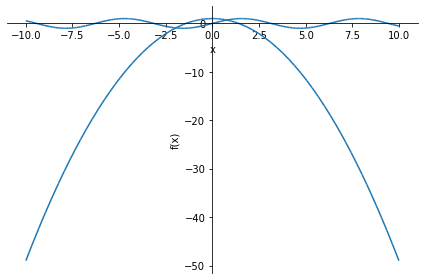

In [9]:

from sympy import *
x = sympy.Symbol('x')
 
eq=sin(x)#define a moderately difficult equation to perform taylor expansion manually

taylorExpand = eq.series(x, 0, 5).removeO()
display(taylorExpand)

 

p1 = plot(eq, show=False)
p2 = plot(diff(taylorExpand), show=False)
p1.append(p2[0])
print('Taylor expansion shows ok behavior near the 0')
p1.show()

Numpy has a method built in to take numerical derivatives with some parameters. Once again, be careful to avoid the lost point. The diff function is also unawayre of the size of the time step.

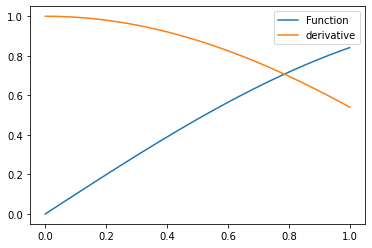

In [12]:
t= np.linspace(0, 1,10000)
e=(t[-1]-t[0])/len(t)
f = np.sin(t)

plt.plot(t,f, label='Function')

df_dt= np.diff(f)/e
plt.plot(t[1:], df_dt,label= 'derivative')
plt.legend()

You can take multiple derivatives, but must be careful as the repeated process amplifies numerical errors.  We have been using very clean input functions, but most data will not be so clean.  Some methods can be used to stabilze the system, such as larger time steps, local taylor series approximations, data smoothing, but all have a price.

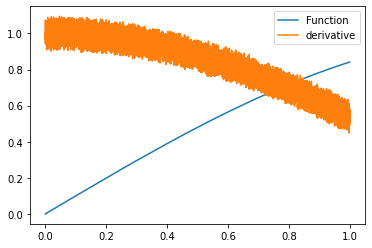

In [23]:
t= np.linspace(0, 1,10000)
e=(t[-1]-t[0])/len(t)
f = np.sin(t) + .00001*np.random.ranf(len(t))  # add a small amount of noise to signal

plt.plot(t,f, label='Function')

df_dt= np.diff(f)/e
plt.plot(t[1:], df_dt,label= 'derivative')
plt.legend()

A longer period can completely wash out the signal

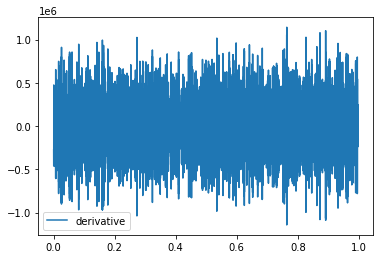

In [31]:
df_dt= np.diff(f,n=25)/e
plt.plot(t[:len(df_dt)], df_dt,label= 'derivative')
plt.legend()

The built in gradient function performs similarily to our homemade finite differenece method, still amplifying the noise

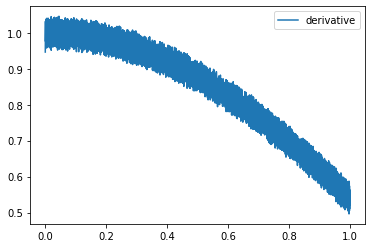

In [32]:
df_dt = np.gradient(f, e)
plt.plot(t[:len(df_dt)], df_dt,label= 'derivative')
plt.legend()

3rd Party tools have been recommeded to help with finding a variety of numerical methods and accuraccies.  findiff is well recommended.

In [35]:
!pip install --upgrade findiff
import findiff

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


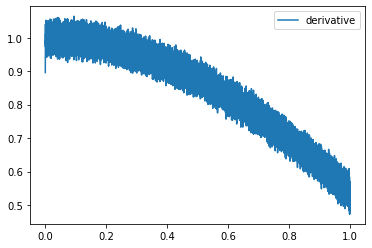

In [38]:
d_dx = findiff.FinDiff(0, e, 1, acc=4)

# Apply it:
df_dt = d_dx(f) 

 
plt.plot(t[:len(df_dt)], df_dt,label= 'derivative')
plt.legend()